# **Corpora Analysis**

In [74]:
%load_ext watermark
%watermark -a 'Navin Kumar M 20BAI1094' -v -p nltk

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Navin Kumar M 20BAI1094

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.34.0

nltk: 3.8.1



In [73]:
import nltk

nltk.download('brown')
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('treebank')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 
nltk.download('stopwords')

from nltk.corpus import (brown, gutenberg, treebank, stopwords)
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import (PorterStemmer, WordNetLemmatizer)
from nltk import FreqDist


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Brown Corpora**

In [31]:
corpora_size = len(brown.words())
corpora_token_size = len(nltk.word_tokenize(brown.raw()))  # brown.raw() -> raw string
corpora_para_size = len(brown.paras())

print(f"{corpora_size = }")
print(f"{corpora_token_size = }")
print(f"{brown.raw()[0:10] = }")
print(f"{corpora_para_size = }")
print(f"{brown.categories() = }")

corpora_size = 1161192
corpora_token_size = 1439319
brown.raw()[0:10] = '\n\n\tThe/at '
corpora_para_size = 15667
brown.categories() = ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


## **Gutenberg Corpora**

In [36]:
print("Number of words : ", len(gutenberg.words()))
print("Number of sentences : ", len(gutenberg.sents()))
print("Number of paragraphs : ", len(gutenberg.paras()))

Number of words :  2621613
Number of sentences :  98552
Number of paragraphs :  47887


In [40]:
print("Avg.Word.Len ","Avg.Sent.Len ","Avg.Wrd.Freq ","FileName ")
for fileid in gutenberg.fileids(): 
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words),"\t\t", round(num_words/num_sents), "\t\t", round(num_words/num_vocab), "\t", fileid)

Avg.Word.Len  Avg.Sent.Len  Avg.Wrd.Freq  FileName 
5 		 25 		 26 	 austen-emma.txt
5 		 26 		 17 	 austen-persuasion.txt
5 		 28 		 22 	 austen-sense.txt
4 		 34 		 79 	 bible-kjv.txt
5 		 19 		 5 	 blake-poems.txt
4 		 19 		 14 	 bryant-stories.txt
4 		 18 		 12 	 burgess-busterbrown.txt
4 		 20 		 13 	 carroll-alice.txt
5 		 20 		 12 	 chesterton-ball.txt
5 		 23 		 11 	 chesterton-brown.txt
5 		 18 		 11 	 chesterton-thursday.txt
4 		 21 		 25 	 edgeworth-parents.txt
5 		 26 		 15 	 melville-moby_dick.txt
5 		 52 		 11 	 milton-paradise.txt
4 		 12 		 9 	 shakespeare-caesar.txt
4 		 12 		 8 	 shakespeare-hamlet.txt
4 		 12 		 7 	 shakespeare-macbeth.txt
5 		 36 		 12 	 whitman-leaves.txt


## **Treebank Corpora**

In [45]:
print(f"{treebank.tagged_sents()}")
print(f"{treebank.tagged_words()}")

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


In [46]:
fdist = nltk.FreqDist(treebank.words())
top_tokens = fdist.most_common(10)
print("Most Frequent Tokens : ", top_tokens)

Most Frequent Tokens :  [(',', 4885), ('the', 4045), ('.', 3828), ('of', 2319), ('to', 2164), ('a', 1878), ('in', 1572), ('and', 1511), ('*-1', 1123), ('0', 1099)]


## **Word Segmentation**

### **Tokenization**

In [48]:
text = "Automatic Multiple Choice Question (MCQ) generation from a text is a popular research area. MCQs are widely accepted for large-scale assessment in various domains and applications. However, manual generation of MCQs is expensive and time-consuming. Therefore, researchers were attracted towards automatic MCQ generation since the late 90’s. Since then, many systems have been developed for MCQ generation. After key selection, the next task becomes a transformation of the declarative sentence into the interrogative form. However, in the literature, we found that this step has been ignored in many MCQ systems. If the transformation is not done, then the sentence remains in its original form, and a blank replaces the key. As a result, it becomes a fillin-the-blank type question with distractors. However, we found several works containing the transformation from the declarative to an interrogative sentence."
tokens = word_tokenize(text)
tokens

['Automatic',
 'Multiple',
 'Choice',
 'Question',
 '(',
 'MCQ',
 ')',
 'generation',
 'from',
 'a',
 'text',
 'is',
 'a',
 'popular',
 'research',
 'area',
 '.',
 'MCQs',
 'are',
 'widely',
 'accepted',
 'for',
 'large-scale',
 'assessment',
 'in',
 'various',
 'domains',
 'and',
 'applications',
 '.',
 'However',
 ',',
 'manual',
 'generation',
 'of',
 'MCQs',
 'is',
 'expensive',
 'and',
 'time-consuming',
 '.',
 'Therefore',
 ',',
 'researchers',
 'were',
 'attracted',
 'towards',
 'automatic',
 'MCQ',
 'generation',
 'since',
 'the',
 'late',
 '90',
 '’',
 's',
 '.',
 'Since',
 'then',
 ',',
 'many',
 'systems',
 'have',
 'been',
 'developed',
 'for',
 'MCQ',
 'generation',
 '.',
 'After',
 'key',
 'selection',
 ',',
 'the',
 'next',
 'task',
 'becomes',
 'a',
 'transformation',
 'of',
 'the',
 'declarative',
 'sentence',
 'into',
 'the',
 'interrogative',
 'form',
 '.',
 'However',
 ',',
 'in',
 'the',
 'literature',
 ',',
 'we',
 'found',
 'that',
 'this',
 'step',
 'has',
 'bee

In [49]:
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sents = sent_tokenizer.tokenize(text)
sents

['Automatic Multiple Choice Question (MCQ) generation from a text is a popular research area.',
 'MCQs are widely accepted for large-scale assessment in various domains and applications.',
 'However, manual generation of MCQs is expensive and time-consuming.',
 'Therefore, researchers were attracted towards automatic MCQ generation since the late 90’s.',
 'Since then, many systems have been developed for MCQ generation.',
 'After key selection, the next task becomes a transformation of the declarative sentence into the interrogative form.',
 'However, in the literature, we found that this step has been ignored in many MCQ systems.',
 'If the transformation is not done, then the sentence remains in its original form, and a blank replaces the key.',
 'As a result, it becomes a fillin-the-blank type question with distractors.',
 'However, we found several works containing the transformation from the declarative to an interrogative sentence.']

### **Stemming**

In [50]:
# Stemming using NLTK
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in tokens]
print(stemmed_words)

['automat', 'multipl', 'choic', 'question', '(', 'mcq', ')', 'gener', 'from', 'a', 'text', 'is', 'a', 'popular', 'research', 'area', '.', 'mcq', 'are', 'wide', 'accept', 'for', 'large-scal', 'assess', 'in', 'variou', 'domain', 'and', 'applic', '.', 'howev', ',', 'manual', 'gener', 'of', 'mcq', 'is', 'expens', 'and', 'time-consum', '.', 'therefor', ',', 'research', 'were', 'attract', 'toward', 'automat', 'mcq', 'gener', 'sinc', 'the', 'late', '90', '’', 's', '.', 'sinc', 'then', ',', 'mani', 'system', 'have', 'been', 'develop', 'for', 'mcq', 'gener', '.', 'after', 'key', 'select', ',', 'the', 'next', 'task', 'becom', 'a', 'transform', 'of', 'the', 'declar', 'sentenc', 'into', 'the', 'interrog', 'form', '.', 'howev', ',', 'in', 'the', 'literatur', ',', 'we', 'found', 'that', 'thi', 'step', 'ha', 'been', 'ignor', 'in', 'mani', 'mcq', 'system', '.', 'if', 'the', 'transform', 'is', 'not', 'done', ',', 'then', 'the', 'sentenc', 'remain', 'in', 'it', 'origin', 'form', ',', 'and', 'a', 'blank'

### **Lemmatization**

In [53]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
lemmatized_words[:10]

['Automatic',
 'Multiple',
 'Choice',
 'Question',
 '(',
 'MCQ',
 ')',
 'generation',
 'from',
 'a']

### **POS Tagging**

In [60]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [72]:
tokenized = sent_tokenize(text)
for i in tokenized:
    wordList =  word_tokenize(i)
    wordsList = [w for w in wordList if not w in stop_words]
    tagged = nltk.pos_tag(wordsList)
    print(tagged)

[('Automatic', 'JJ'), ('Multiple', 'NNP'), ('Choice', 'NNP'), ('Question', 'NNP'), ('(', '('), ('MCQ', 'NNP'), (')', ')'), ('generation', 'NN'), ('text', 'IN'), ('popular', 'JJ'), ('research', 'NN'), ('area', 'NN'), ('.', '.')]
[('MCQs', 'NNP'), ('widely', 'RB'), ('accepted', 'VBD'), ('large-scale', 'JJ'), ('assessment', 'NN'), ('various', 'JJ'), ('domains', 'NNS'), ('applications', 'NNS'), ('.', '.')]
[('However', 'RB'), (',', ','), ('manual', 'JJ'), ('generation', 'NN'), ('MCQs', 'NNP'), ('expensive', 'JJ'), ('time-consuming', 'NN'), ('.', '.')]
[('Therefore', 'RB'), (',', ','), ('researchers', 'NNS'), ('attracted', 'VBD'), ('towards', 'NNS'), ('automatic', 'JJ'), ('MCQ', 'NNP'), ('generation', 'NN'), ('since', 'IN'), ('late', 'JJ'), ('90', 'CD'), ('’', 'NN'), ('.', '.')]
[('Since', 'IN'), (',', ','), ('many', 'JJ'), ('systems', 'NNS'), ('developed', 'VBD'), ('MCQ', 'NNP'), ('generation', 'NN'), ('.', '.')]
[('After', 'IN'), ('key', 'JJ'), ('selection', 'NN'), (',', ','), ('next', 'J

##  **Analysis**

Length: 13
Unique Tokens Count: 11
Unique Tokens: {'t', 'x', 'i', 'v', 'l', 'e', '.', 'j', 'b', 'k', '-'}
Sorted Tokens: ['-', '.', 'b', 'e', 'i', 'j', 'k', 'l', 't', 'v', 'x']
Lexical Richness: 1.1818181818181819
Word Frequency 'heaven': 0
Word Frequency 'to': 0
Frequency Distribution: <FreqDist with 11 samples and 13 outcomes>
Hapaxes: ['i', 'l', 'e', '-', 'k', 'j', 'v', '.', 'x']
Most Common Tokens:
('b', 2)
('t', 2)
('i', 1)
('l', 1)
('e', 1)
('-', 1)
('k', 1)
('j', 1)
('v', 1)
('.', 1)


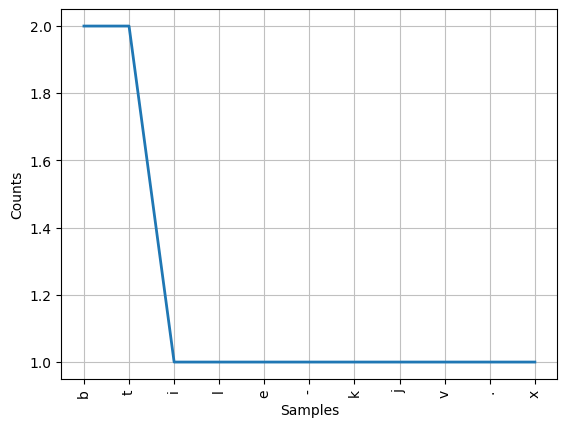

Length: 15
Unique Tokens Count: 13
Unique Tokens: {'t', 'x', 'p', 'm', 'l', 'e', '.', 'o', 's', 'a', 'b', 'k', '-'}
Sorted Tokens: ['-', '.', 'a', 'b', 'e', 'k', 'l', 'm', 'o', 'p', 's', 't', 'x']
Lexical Richness: 1.1538461538461537
Word Frequency 'heaven': 0
Word Frequency 'to': 0
Frequency Distribution: <FreqDist with 13 samples and 15 outcomes>
Hapaxes: ['b', 'l', 'a', 'k', '-', 'p', 'o', 'm', 's', '.', 'x']
Most Common Tokens:
('e', 2)
('t', 2)
('b', 1)
('l', 1)
('a', 1)
('k', 1)
('-', 1)
('p', 1)
('o', 1)
('m', 1)


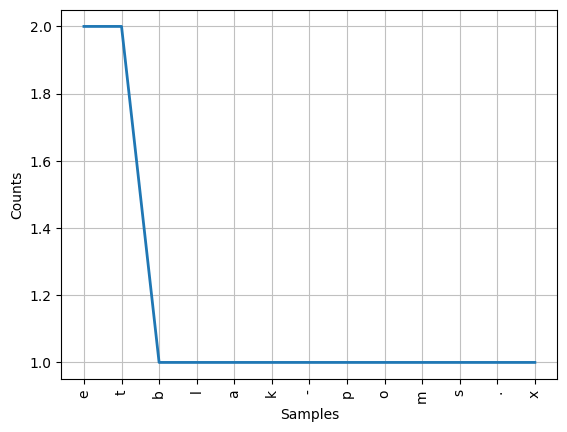

Length: 19
Unique Tokens Count: 15
Unique Tokens: {'t', 'x', 'i', 'n', 'p', 'm', 'd', 'l', 'e', '.', 'o', 's', 'r', 'a', '-'}
Sorted Tokens: ['-', '.', 'a', 'd', 'e', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'x']
Lexical Richness: 1.2666666666666666
Word Frequency 'heaven': 0
Word Frequency 'to': 1
Frequency Distribution: <FreqDist with 15 samples and 19 outcomes>
Hapaxes: ['m', 'l', 'o', 'n', '-', 'p', 'r', 'd', 's', 'e', '.', 'x']
Most Common Tokens:
('t', 3)
('i', 2)
('a', 2)
('m', 1)
('l', 1)
('o', 1)
('n', 1)
('-', 1)
('p', 1)
('r', 1)


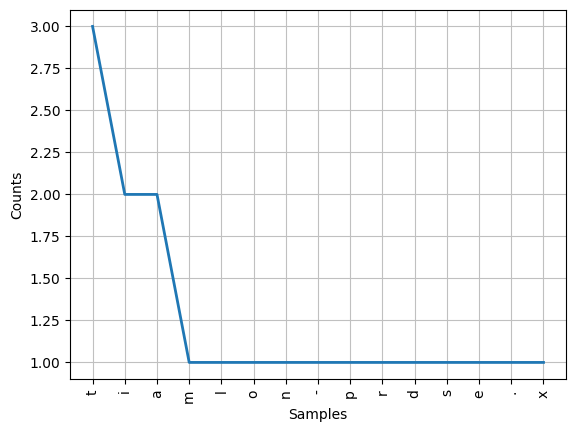

Length: 22
Unique Tokens Count: 13
Unique Tokens: {'t', 'x', 'p', 'm', 'e', 'l', '.', 'h', 's', 'r', 'a', 'k', '-'}
Sorted Tokens: ['-', '.', 'a', 'e', 'h', 'k', 'l', 'm', 'p', 'r', 's', 't', 'x']
Lexical Richness: 1.6923076923076923
Word Frequency 'heaven': 0
Word Frequency 'to': 0
Frequency Distribution: <FreqDist with 13 samples and 22 outcomes>
Hapaxes: ['k', 'p', 'r', '-', 'm', 'l', '.', 'x']
Most Common Tokens:
('e', 4)
('a', 3)
('t', 3)
('s', 2)
('h', 2)
('k', 1)
('p', 1)
('r', 1)
('-', 1)
('m', 1)


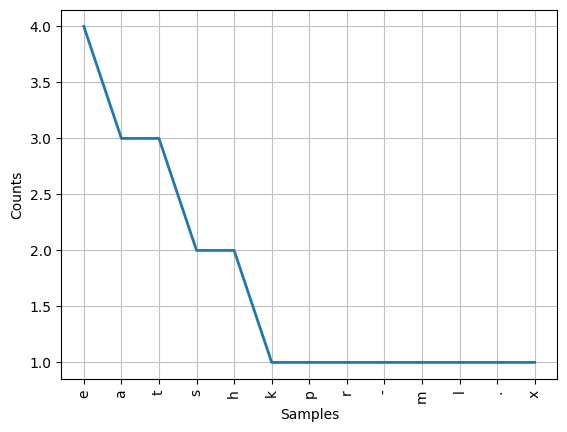

Length: 22
Unique Tokens Count: 16
Unique Tokens: {'t', 'x', 'i', 'c', 'v', 'd', 'm', 'l', 'e', '.', '_', 'o', 'y', 'b', 'k', '-'}
Sorted Tokens: ['-', '.', '_', 'b', 'c', 'd', 'e', 'i', 'k', 'l', 'm', 'o', 't', 'v', 'x', 'y']
Lexical Richness: 1.375
Word Frequency 'heaven': 0
Word Frequency 'to': 0
Frequency Distribution: <FreqDist with 16 samples and 22 outcomes>
Hapaxes: ['v', '-', 'o', 'b', 'y', '_', 'd', 'c', 'k', '.', 'x']
Most Common Tokens:
('l', 3)
('m', 2)
('e', 2)
('i', 2)
('t', 2)
('v', 1)
('-', 1)
('o', 1)
('b', 1)
('y', 1)


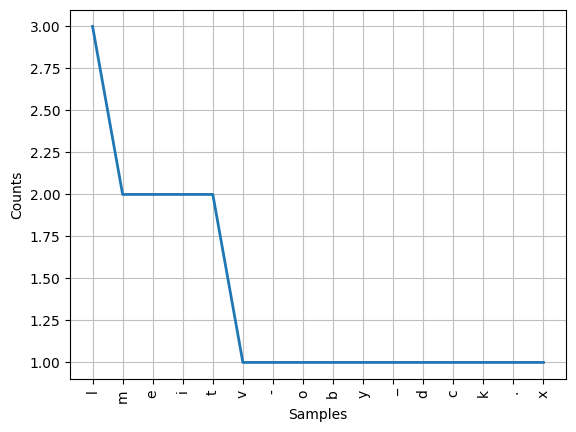

Length: 18
Unique Tokens Count: 14
Unique Tokens: {'w', 't', 'x', 'i', 'n', 'v', 'm', 'l', 'e', '.', 'h', 's', 'a', '-'}
Sorted Tokens: ['-', '.', 'a', 'e', 'h', 'i', 'l', 'm', 'n', 's', 't', 'v', 'w', 'x']
Lexical Richness: 1.2857142857142858
Word Frequency 'heaven': 0
Word Frequency 'to': 0
Frequency Distribution: <FreqDist with 14 samples and 18 outcomes>
Hapaxes: ['w', 'h', 'i', 'm', 'n', '-', 'l', 'v', 's', '.', 'x']
Most Common Tokens:
('t', 3)
('a', 2)
('e', 2)
('w', 1)
('h', 1)
('i', 1)
('m', 1)
('n', 1)
('-', 1)
('l', 1)


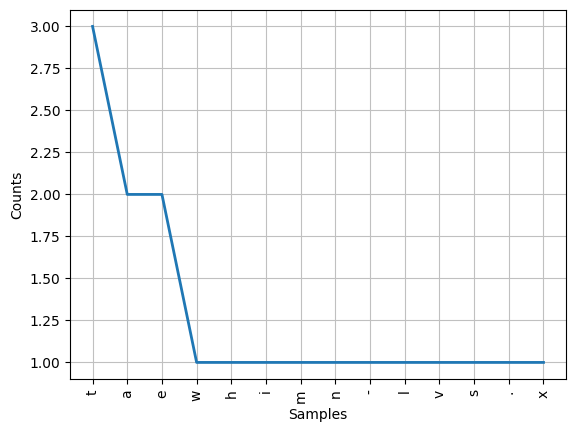

In [76]:
class TextAnalyzer:
    def __init__(self, corpus):
        self.corpus = corpus
        self.freq_dist = FreqDist(self.corpus)

    def get_lengths(self):
        return len(self.corpus)

    def get_unique_tokens_count(self):
        return len(set(self.corpus))

    def get_unique_tokens(self):
        return set(self.corpus)

    def get_sorted_tokens(self):
        return sorted(set(self.corpus))

    def get_lexical_richness(self):
        return len(self.corpus) / len(set(self.corpus))

    def get_word_frequency(self, word):
        return self.corpus.count(word)

    def get_frequency_distribution(self):
        return self.freq_dist

    def get_hapaxes(self):
        return self.freq_dist.hapaxes()

    def get_most_common(self, num=10):
        return self.freq_dist.most_common(num)

    def print_items(self, items):
        for item in items:
            print(item)

    def plot_frequency_distribution(self):
        self.freq_dist.plot()

    def analyze_text(self):
        len_text = self.get_lengths()
        print("Length:", len_text)

        unique_tokens_count = self.get_unique_tokens_count()
        print("Unique Tokens Count:", unique_tokens_count)

        unique_tokens = self.get_unique_tokens()
        print("Unique Tokens:", unique_tokens)

        sorted_tokens = self.get_sorted_tokens()
        print("Sorted Tokens:", sorted_tokens)

        lexical_richness = self.get_lexical_richness()
        print("Lexical Richness:", lexical_richness)

        word_freq_heaven = self.get_word_frequency("heaven")
        word_freq_to = self.get_word_frequency("to")
        print("Word Frequency 'heaven':", word_freq_heaven)
        print("Word Frequency 'to':", word_freq_to)

        print("Frequency Distribution:", self.freq_dist)

        hapaxes = self.get_hapaxes()
        print("Hapaxes:", hapaxes)

        most_common = self.get_most_common(10)
        print("Most Common Tokens:")
        self.print_items(most_common)

        self.plot_frequency_distribution()

# Usage
corpus = [
    'bible-kjv.txt',
    'blake-poems.txt',
    'milton-paradise.txt',
    'shakespeare-hamlet.txt',
    'melville-moby_dick.txt',
    'whitman-leaves.txt',
]

for corpora in corpus:
    analyzer = TextAnalyzer(corpora)
    analyzer.analyze_text()


